In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [5]:
df.DATE.dtype


dtype('int64')

In [6]:
df["DATE"]=pd.to_datetime(df['DATE'],unit="s")

In [7]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [8]:
df1=df.copy()
df1['DATE']=df1['DATE'].dt.date

In [9]:
df1.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [10]:
df1.set_index('DATE',inplace=True)

In [11]:
df1.isnull().sum()

SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
NASDAQ.ADI     0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 501, dtype: int64

In [12]:
df_AAPL= df1[['NASDAQ.AAPL']]
df_AAPL.head()

,NASDAQ.AAPL
DATE,
2017-04-03,143.6800
2017-04-03,143.7000
2017-04-03,143.6901
2017-04-03,143.6400
2017-04-03,143.6600


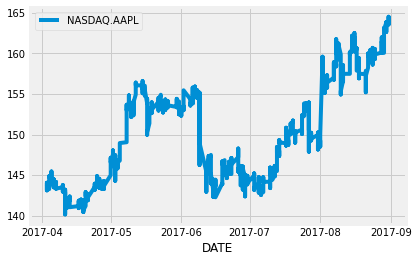

In [13]:
df_AAPL.plot()

In [14]:
# H0 :- it is not stationary
# H1 :- it is stationary
# from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1. ADF  :",dftest[0])
    print("2. P- value  :",dftest[1])
    print("3.num of lags  :",dftest[2])
    print("4. num of observation  used for ADF regression and critical value calculation  :",dftest[3])
    print("5. critical value  :")
    for key,val in dftest[4].items():
        print("\t",key," :",val)
    if dftest[1]<=0.05:
        print("rejecting the null hypothesis, it is stationary")
    else:
        print("it is not stationary")

In [15]:
ad_test(df_AAPL)

1. ADF  : -0.9128532997926634
2. P- value  : 0.7837101772613879
3.num of lags  : 31
4. num of observation  used for ADF regression and critical value calculation  : 41234
5. critical value  :
	 1%  : -3.4305085998723857
	 5%  : -2.8616100975579815
	 10%  : -2.5668073106689477
it is not stationary


In [18]:
df_AAPL = df_AAPL.copy()
df_AAPL.loc[:,"NASDAQ.AAPL_diff"]=df_AAPL["NASDAQ.AAPL"]- df_AAPL["NASDAQ.AAPL"].shift(1)

In [19]:
ad_test(df_AAPL['NASDAQ.AAPL_diff'].dropna())

1. ADF  : -35.73774148340116
2. P- value  : 0.0
3.num of lags  : 30
4. num of observation  used for ADF regression and critical value calculation  : 41234
5. critical value  :
	 1%  : -3.4305085998723857
	 5%  : -2.8616100975579815
	 10%  : -2.5668073106689477
rejecting the null hypothesis, it is stationary


In [20]:
df_AAPL.head()

,NASDAQ.AAPL,NASDAQ.AAPL_diff
DATE,,
2017-04-03,143.6800,NaN
2017-04-03,143.7000,0.0200
2017-04-03,143.6901,-0.0099
2017-04-03,143.6400,-0.0501
2017-04-03,143.6600,0.0200


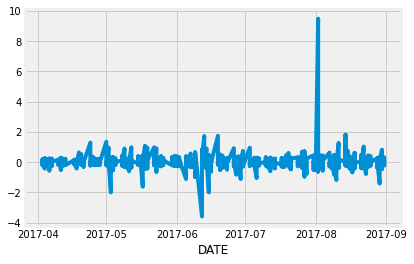

In [21]:
df_AAPL['NASDAQ.AAPL_diff'].plot()

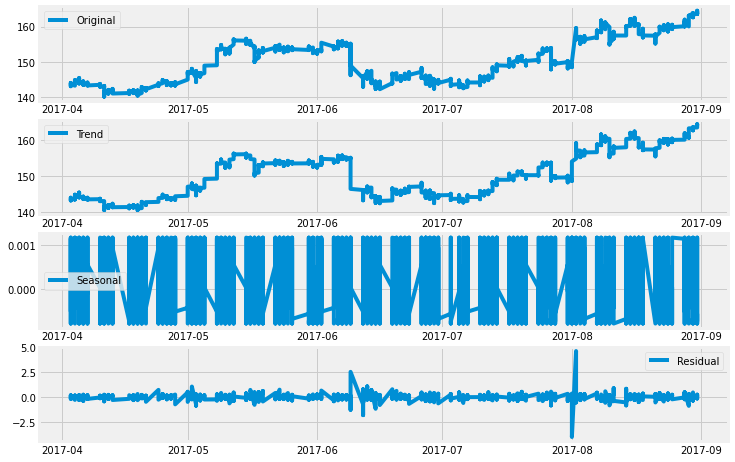

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_AAPL['NASDAQ.AAPL'],period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_AAPL['NASDAQ.AAPL'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
# decomposition.plot()
# plt.show()

# This data is seasonal as interpreted by seasonal decomposition plot

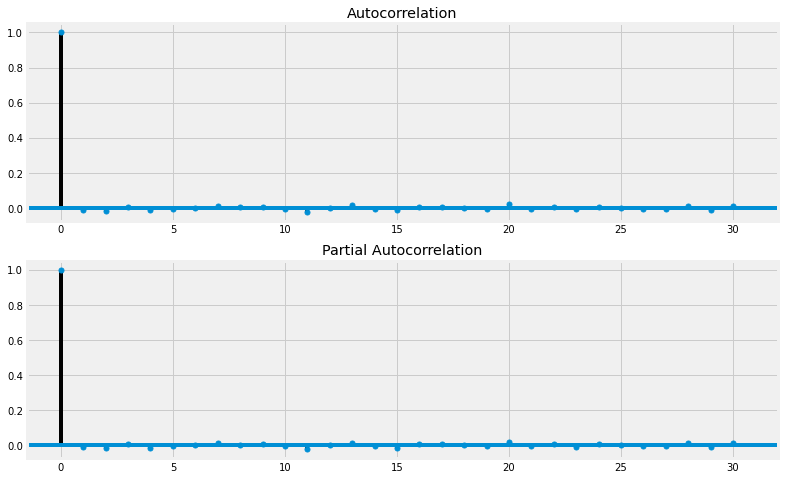

In [23]:
# show plots in the notebook


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_AAPL["NASDAQ.AAPL_diff"].iloc[1:], lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_AAPL["NASDAQ.AAPL_diff"].iloc[1:], lags=30, ax=ax2)

In [24]:
# Lets do analysis using Seasonal ARIMA model
model= sm.tsa.statespace.SARIMAX(df_AAPL['NASDAQ.AAPL'],order=(0,1,0),seasonal_order=(0
,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.AAPL   No. Observations:                41266
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               24926.454
Date:                            Sat, 06 Mar 2021   AIC                         -49850.909
Time:                                    18:09:01   BIC                         -49842.281
Sample:                                         0   HQIC                        -49848.182
                                          - 41266                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0175   4.57e-06   3828.769      0.000       0.017       0.017
Ljung-Box (Q):                    1

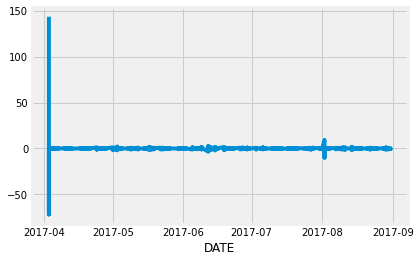

In [25]:
results.resid.plot()


In [26]:
df_AAPL = df_AAPL.copy()
df_AAPL['Forecast'] = results.predict()

In [27]:
df_AAPL.head()


,NASDAQ.AAPL,NASDAQ.AAPL_diff,Forecast
DATE,,,
2017-04-03,143.6800,NaN,0.0000
2017-04-03,143.7000,0.0200,143.6800
2017-04-03,143.6901,-0.0099,143.7000
2017-04-03,143.6400,-0.0501,143.6901
2017-04-03,143.6600,0.0200,143.6400


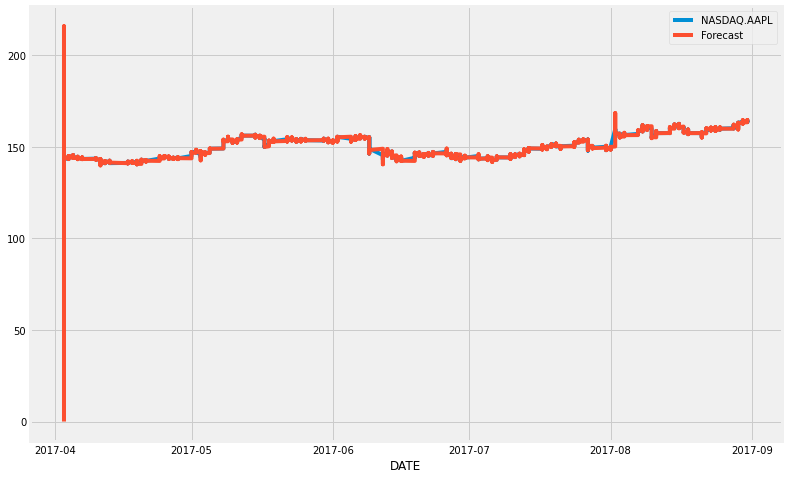

In [28]:
# Prediction of future values
df_AAPL[['NASDAQ.AAPL','Forecast']].plot(figsize=(12,8))

In [33]:
results.forecast(steps=10)

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41266    163.960
41267    163.935
41268    163.910
41269    163.810
41270    163.940
41271    163.950
41272    163.890
41273    163.860
41274    163.870
41275    163.760
dtype: float64

In [34]:
results.predict(start=41264,end=41274)

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41264    164.055
41265    163.930
41266    163.960
41267    163.935
41268    163.910
41269    163.810
41270    163.940
41271    163.950
41272    163.890
41273    163.860
41274    163.870
dtype: float64

In [35]:
# Accuracy of the Forecast using MSE-Mean Squared Error
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))


Mean Squared Error NASDAQ.AAPL - 0.6429876603928889
Mean Absolute Error NASDAQ.AAPL - 0.07550976582160317


In [36]:
# Time Series Forecasting for NASDAQ.ADP
df_ADP= df1[['NASDAQ.ADP']]
df_ADP.head()

,NASDAQ.ADP
DATE,
2017-04-03,102.2300
2017-04-03,102.1400
2017-04-03,102.2125
2017-04-03,102.1400
2017-04-03,102.0600


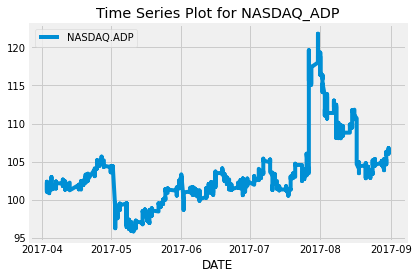

In [37]:
df_ADP.plot()
plt.title('Time Series Plot for NASDAQ_ADP')
plt.show()

In [38]:
ad_test(df_ADP['NASDAQ.ADP'])

1. ADF  : -1.7041735251574752
2. P- value  : 0.42896344420668664
3.num of lags  : 39
4. num of observation  used for ADF regression and critical value calculation  : 41226
5. critical value  :
	 1%  : -3.4305086306509716
	 5%  : -2.861610111161057
	 10%  : -2.5668073179094897
it is not stationary


In [39]:
df_ADP["NASDAQ.ADP_diff"]=df_ADP["NASDAQ.ADP"]- df_ADP["NASDAQ.ADP"].shift(1)

<ipython-input-39-4721e9325da4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ADP["NASDAQ.ADP_diff"]=df_ADP["NASDAQ.ADP"]- df_ADP["NASDAQ.ADP"].shift(1)


In [40]:
df_ADP.head()

,NASDAQ.ADP,NASDAQ.ADP_diff
DATE,,
2017-04-03,102.2300,NaN
2017-04-03,102.1400,-0.0900
2017-04-03,102.2125,0.0725
2017-04-03,102.1400,-0.0725
2017-04-03,102.0600,-0.0800


In [41]:
ad_test(df_ADP['NASDAQ.ADP_diff'].dropna())

1. ADF  : -31.05566224463164
2. P- value  : 0.0
3.num of lags  : 38
4. num of observation  used for ADF regression and critical value calculation  : 41226
5. critical value  :
	 1%  : -3.4305086306509716
	 5%  : -2.861610111161057
	 10%  : -2.5668073179094897
rejecting the null hypothesis, it is stationary


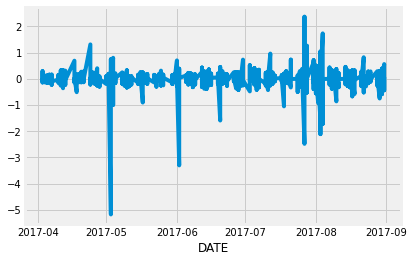

In [42]:
df_ADP['NASDAQ.ADP_diff'].plot()

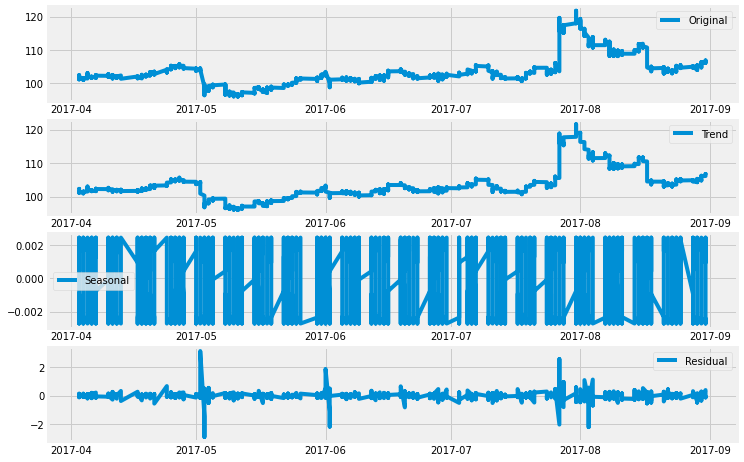

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_ADP['NASDAQ.ADP'],period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_ADP['NASDAQ.ADP'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')


# Note: The data for NASDAQ.ADP is seasonal as interpreted from the seasonal plot of seasonal decomposition.

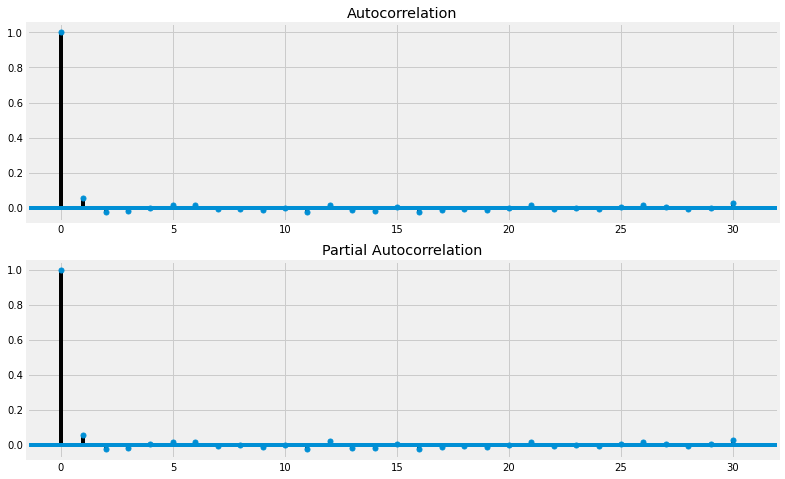

In [44]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_ADP["NASDAQ.ADP_diff"].iloc[1:], lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_ADP["NASDAQ.ADP_diff"].iloc[1:], lags=30, ax=ax2)

In [45]:
model= sm.tsa.statespace.SARIMAX(df_ADP['NASDAQ.ADP'],order=(0,1,0),seasonal_order=(0,1
,0,12))
results = model.fit()
print(results.summary())

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                      
Dep. Variable:                         NASDAQ.ADP   No. Observations:                41266
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               34733.578
Date:                            Sat, 06 Mar 2021   AIC                         -69465.155
Time:                                    18:21:13   BIC                         -69456.528
Sample:                                         0   HQIC                        -69462.428
                                          - 41266                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0109   5.34e-06   2036.664      0.000       0.011       0.011
Ljung-Box (Q):                    1

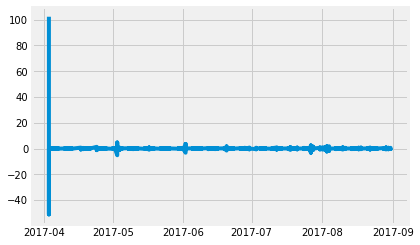

In [46]:
plt.plot(results.resid)

In [47]:
df_ADP['Forecast'] = results.predict()

<ipython-input-47-ff476a1d45df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ADP['Forecast'] = results.predict()


In [48]:
df_ADP[['NASDAQ.ADP','Forecast']].head()

,NASDAQ.ADP,Forecast
DATE,,
2017-04-03,102.2300,0.0000
2017-04-03,102.1400,102.2300
2017-04-03,102.2125,102.1400
2017-04-03,102.1400,102.2125
2017-04-03,102.0600,102.1400


In [49]:
results.forecast(steps=10)

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41266    106.470
41267    106.470
41268    106.440
41269    106.380
41270    106.440
41271    106.420
41272    106.450
41273    106.385
41274    106.410
41275    106.340
dtype: float64

In [50]:
results.predict(start=41264,end=41275)

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41264    106.480
41265    106.430
41266    106.470
41267    106.470
41268    106.440
41269    106.380
41270    106.440
41271    106.420
41272    106.450
41273    106.385
41274    106.410
41275    106.340
dtype: float64

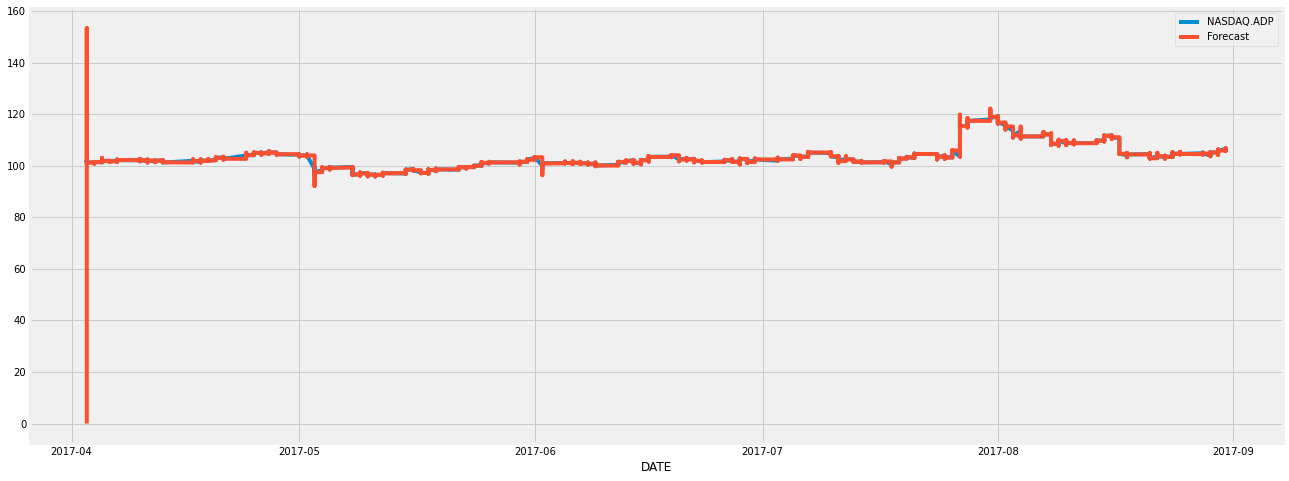

In [51]:
df_ADP[['NASDAQ.ADP','Forecast']].plot(figsize=(20,8))

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_ADP['NASDAQ.ADP'],df_ADP['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_ADP['NASDAQ.ADP'],df_ADP['Forecast']))


Mean Squared Error NASDAQ.AAPL - 0.3274673956410889
Mean Absolute Error NASDAQ.AAPL - 0.0534050162615795


In [53]:
# Time Series Forecasting for NASDAQ.ADP
df_CBOE= df1[['NASDAQ.CBOE']]
df_CBOE.head()

,NASDAQ.CBOE
DATE,
2017-04-03,81.03
2017-04-03,81.21
2017-04-03,81.21
2017-04-03,81.13
2017-04-03,81.12


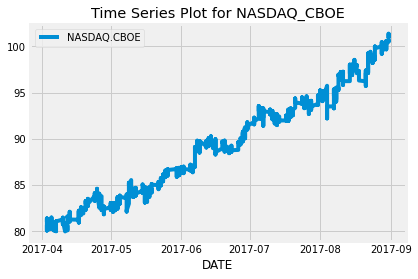

In [54]:
df_CBOE.plot()
plt.title('Time Series Plot for NASDAQ_CBOE')
plt.show()

In [55]:
ad_test(df_CBOE['NASDAQ.CBOE'])

1. ADF  : 0.1663393028261288
2. P- value  : 0.9703092030510062
3.num of lags  : 27
4. num of observation  used for ADF regression and critical value calculation  : 41238
5. critical value  :
	 1%  : -3.430508584487571
	 5%  : -2.8616100907584228
	 10%  : -2.5668073070497304
it is not stationary


In [56]:
df_CBOE["NASDAQ.CBOE_diff"]=df_CBOE["NASDAQ.CBOE"]- df_CBOE["NASDAQ.CBOE"].shift(1)

<ipython-input-56-ef1f25af48d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CBOE["NASDAQ.CBOE_diff"]=df_CBOE["NASDAQ.CBOE"]- df_CBOE["NASDAQ.CBOE"].shift(1)


In [57]:
df_CBOE.head()

,NASDAQ.CBOE,NASDAQ.CBOE_diff
DATE,,
2017-04-03,81.03,NaN
2017-04-03,81.21,0.18
2017-04-03,81.21,0.00
2017-04-03,81.13,-0.08
2017-04-03,81.12,-0.01


In [58]:
ad_test(df_CBOE['NASDAQ.CBOE_diff'].dropna())

1. ADF  : -41.642093645431686
2. P- value  : 0.0
3.num of lags  : 26
4. num of observation  used for ADF regression and critical value calculation  : 41238
5. critical value  :
	 1%  : -3.430508584487571
	 5%  : -2.8616100907584228
	 10%  : -2.5668073070497304
rejecting the null hypothesis, it is stationary


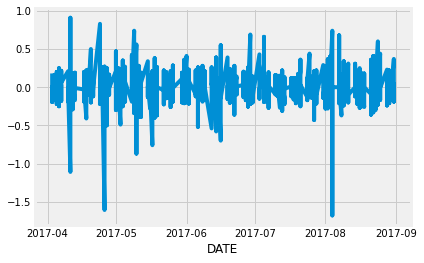

In [59]:
df_CBOE['NASDAQ.CBOE_diff'].plot()

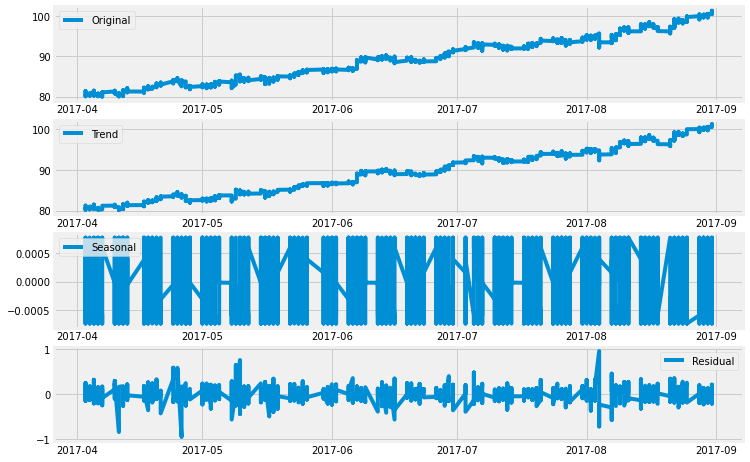

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_CBOE['NASDAQ.CBOE'],period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_CBOE['NASDAQ.CBOE'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

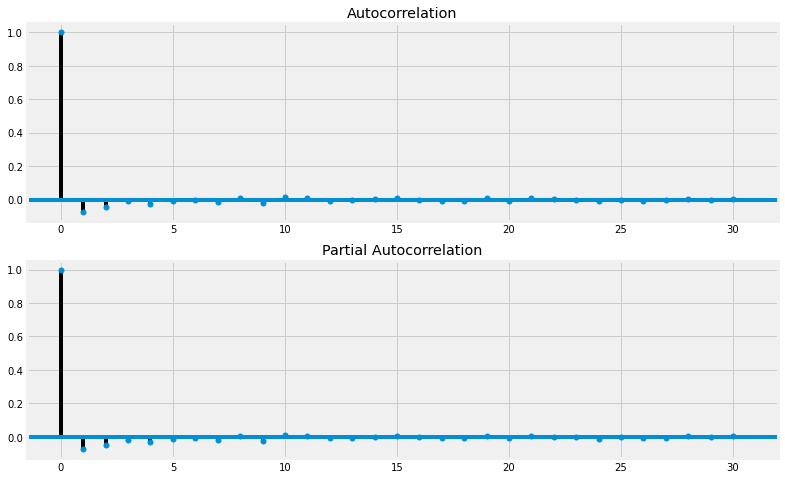

In [61]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CBOE["NASDAQ.CBOE_diff"].iloc[1:], lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CBOE["NASDAQ.CBOE_diff"].iloc[1:], lags=30, ax=ax2)

In [62]:
model= sm.tsa.statespace.SARIMAX(df_CBOE['NASDAQ.CBOE'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.CBOE   No. Observations:                41266
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               53414.965
Date:                            Sat, 06 Mar 2021   AIC                        -106827.930
Time:                                    18:25:03   BIC                        -106819.303
Sample:                                         0   HQIC                       -106825.203
                                          - 41266                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0044   5.33e-06    824.253      0.000       0.004       0.004
Ljung-Box (Q):                    1

In [63]:
df_CBOE['Forecast'] = results.predict()

<ipython-input-63-a13a8cb63f1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CBOE['Forecast'] = results.predict()


In [64]:
df_CBOE[['NASDAQ.CBOE','Forecast']].head()

,NASDAQ.CBOE,Forecast
DATE,,
2017-04-03,81.03,0.00
2017-04-03,81.21,81.03
2017-04-03,81.21,81.21
2017-04-03,81.13,81.21
2017-04-03,81.12,81.13


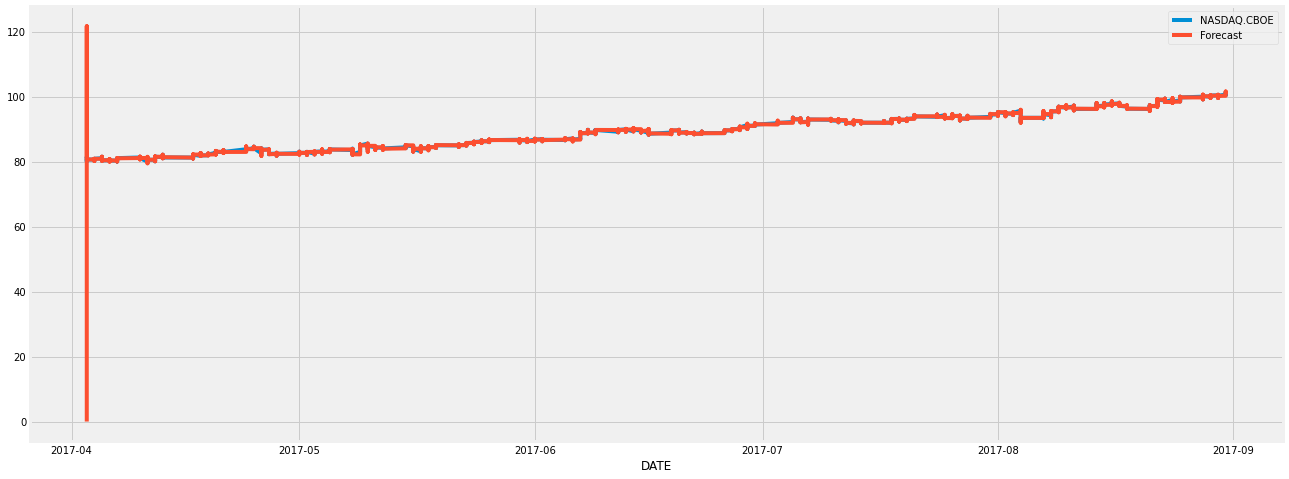

In [65]:
df_CBOE[['NASDAQ.CBOE','Forecast']].plot(figsize=(20,8))

In [66]:
results.forecast(steps=10)

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41266    100.8400
41267    100.8900
41268    100.9100
41269    100.8700
41270    100.8800
41271    100.8700
41272    100.8799
41273    100.8800
41274    100.8700
41275    100.8500
dtype: float64

In [67]:
results.predict(start=41264,end=41273)

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41264    100.8550
41265    100.8200
41266    100.8400
41267    100.8900
41268    100.9100
41269    100.8700
41270    100.8800
41271    100.8700
41272    100.8799
41273    100.8800
dtype: float64

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_CBOE['NASDAQ.CBOE'],df_CBOE['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_CBOE['NASDAQ.CBOE'],df_CBOE['Forecast']))


Mean Squared Error NASDAQ.AAPL - 0.2032529041215958
Mean Absolute Error NASDAQ.AAPL - 0.04356670382934312


In [69]:
# Time Series Forecasting for NASDAQ.ADP
df_CSCO= df1[['NASDAQ.CSCO']]
df_CSCO.head()

,NASDAQ.CSCO
DATE,
2017-04-03,33.7400
2017-04-03,33.8800
2017-04-03,33.9000
2017-04-03,33.8499
2017-04-03,33.8400


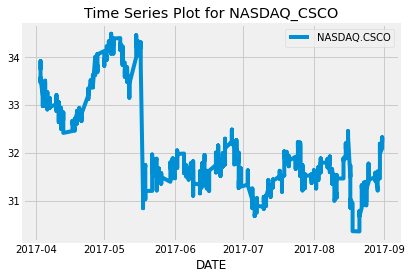

In [70]:
df_CSCO.plot()
plt.title('Time Series Plot for NASDAQ_CSCO')
plt.show()

In [71]:
ad_test(df_CSCO['NASDAQ.CSCO'])

1. ADF  : -2.3955546108894694
2. P- value  : 0.14299501995164238
3.num of lags  : 47
4. num of observation  used for ADF regression and critical value calculation  : 41218
5. critical value  :
	 1%  : -3.430508661441506
	 5%  : -2.8616101247694137
	 10%  : -2.566807325152842
it is not stationary


In [72]:
df_CSCO["NASDAQ.CSCO_diff"]=df_CSCO["NASDAQ.CSCO"]- df_CSCO["NASDAQ.CSCO"].shift(1)

<ipython-input-72-5c2477f72747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CSCO["NASDAQ.CSCO_diff"]=df_CSCO["NASDAQ.CSCO"]- df_CSCO["NASDAQ.CSCO"].shift(1)


In [73]:
ad_test(df_CSCO['NASDAQ.CSCO_diff'].dropna())

1. ADF  : -30.356682532566577
2. P- value  : 0.0
3.num of lags  : 46
4. num of observation  used for ADF regression and critical value calculation  : 41218
5. critical value  :
	 1%  : -3.430508661441506
	 5%  : -2.8616101247694137
	 10%  : -2.566807325152842
rejecting the null hypothesis, it is stationary


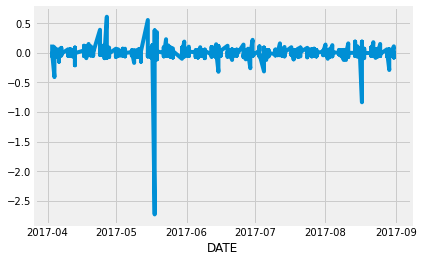

In [74]:
df_CSCO['NASDAQ.CSCO_diff'].plot()

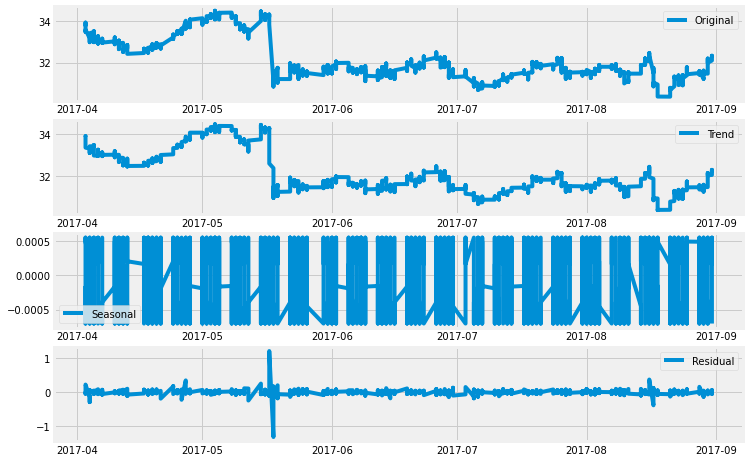

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_CSCO['NASDAQ.CSCO'],period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_CSCO['NASDAQ.CSCO'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

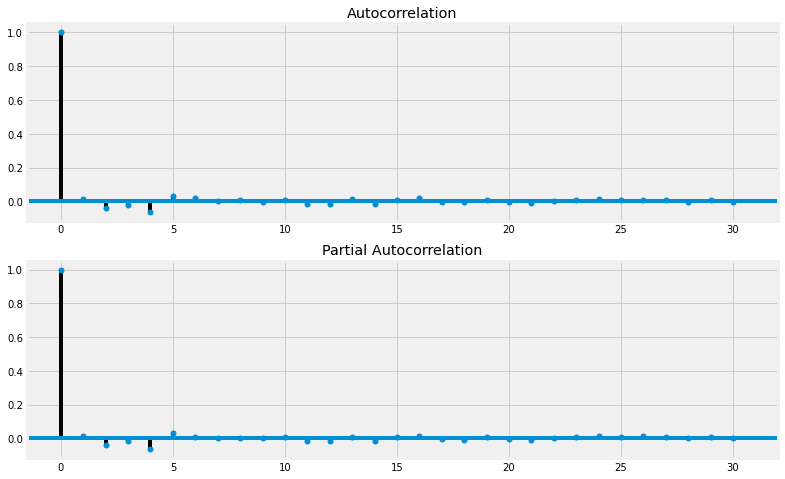

In [76]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CSCO["NASDAQ.CSCO_diff"].iloc[1:], lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CSCO["NASDAQ.CSCO_diff"].iloc[1:], lags=30, ax=ax2)

In [77]:
model= sm.tsa.statespace.SARIMAX(df_CSCO['NASDAQ.CSCO'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.CSCO   No. Observations:                41266
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               85495.358
Date:                            Sat, 06 Mar 2021   AIC                        -170988.715
Time:                                    18:29:46   BIC                        -170980.088
Sample:                                         0   HQIC                       -170985.988
                                          - 41266                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009   1.54e-07   6010.114      0.000       0.001       0.001
Ljung-Box (Q):                    1

In [78]:
df_CSCO['Forecast'] = results.predict()

<ipython-input-78-59e0e7282925>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CSCO['Forecast'] = results.predict()


In [79]:
df_CSCO[['NASDAQ.CSCO','Forecast']].head()

,NASDAQ.CSCO,Forecast
DATE,,
2017-04-03,33.7400,0.0000
2017-04-03,33.8800,33.7400
2017-04-03,33.9000,33.8800
2017-04-03,33.8499,33.9000
2017-04-03,33.8400,33.8499


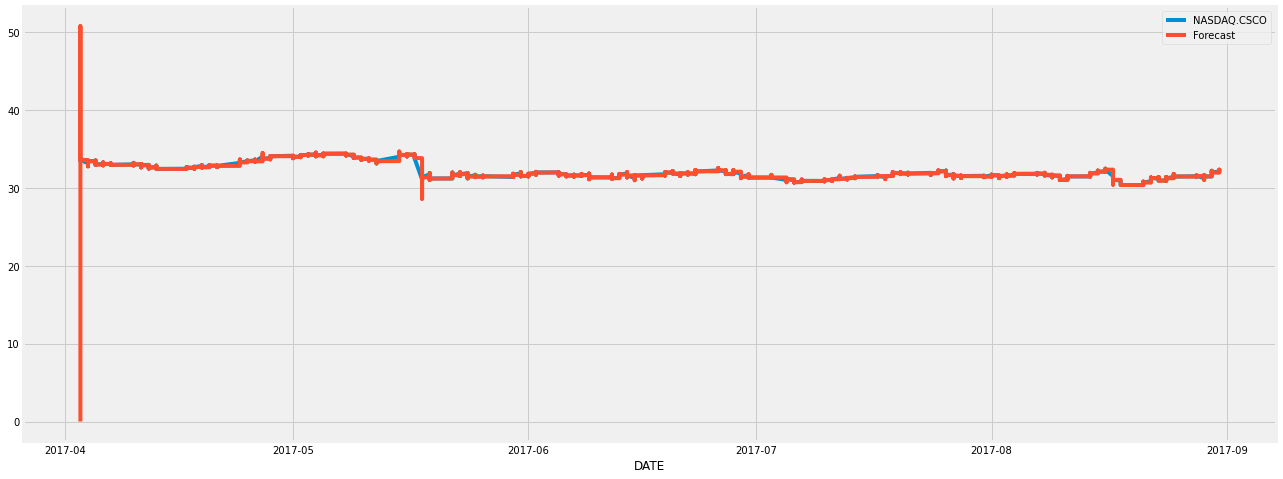

In [80]:
df_CSCO[['NASDAQ.CSCO','Forecast']].plot(figsize=(20,8))

In [81]:
results.forecast(steps=10)

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41266    32.225
41267    32.190
41268    32.170
41269    32.150
41270    32.180
41271    32.170
41272    32.150
41273    32.165
41274    32.180
41275    32.180
dtype: float64

In [82]:
results.predict(start=41264,end=41275)

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41264    32.190
41265    32.195
41266    32.225
41267    32.190
41268    32.170
41269    32.150
41270    32.180
41271    32.170
41272    32.150
41273    32.165
41274    32.180
41275    32.180
dtype: float64

In [83]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_CSCO['NASDAQ.CSCO'],df_CSCO['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_CSCO['NASDAQ.CSCO'],df_CSCO['Forecast']))


Mean Squared Error NASDAQ.AAPL - 0.03540725416718677
Mean Absolute Error NASDAQ.AAPL - 0.015776484137647602


In [84]:
# Time Series Forecasting for NASDAQ.ADP
df_EBAY= df1[['NASDAQ.EBAY']]
df_EBAY.head()

,NASDAQ.EBAY
DATE,
2017-04-03,33.3975
2017-04-03,33.3950
2017-04-03,33.4100
2017-04-03,33.3350
2017-04-03,33.4000


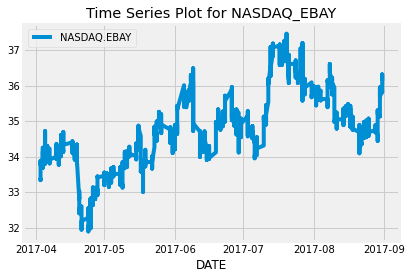

In [85]:
df_EBAY.plot()
plt.title('Time Series Plot for NASDAQ_EBAY')
plt.show()

In [86]:
ad_test(df_EBAY['NASDAQ.EBAY'])

1. ADF  : -1.8757616359414273
2. P- value  : 0.3435480878024695
3.num of lags  : 47
4. num of observation  used for ADF regression and critical value calculation  : 41218
5. critical value  :
	 1%  : -3.430508661441506
	 5%  : -2.8616101247694137
	 10%  : -2.566807325152842
it is not stationary


In [87]:
df_EBAY["NASDAQ.EBAY_diff"]=df_EBAY["NASDAQ.EBAY"]- df_EBAY["NASDAQ.EBAY"].shift(1)

<ipython-input-87-ee2cf65660d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EBAY["NASDAQ.EBAY_diff"]=df_EBAY["NASDAQ.EBAY"]- df_EBAY["NASDAQ.EBAY"].shift(1)


In [88]:
ad_test(df_EBAY['NASDAQ.EBAY_diff'].dropna())

1. ADF  : -30.67961923919459
2. P- value  : 0.0
3.num of lags  : 46
4. num of observation  used for ADF regression and critical value calculation  : 41218
5. critical value  :
	 1%  : -3.430508661441506
	 5%  : -2.8616101247694137
	 10%  : -2.566807325152842
rejecting the null hypothesis, it is stationary


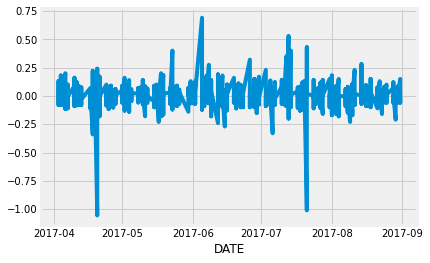

In [89]:
df_EBAY['NASDAQ.EBAY_diff'].plot()

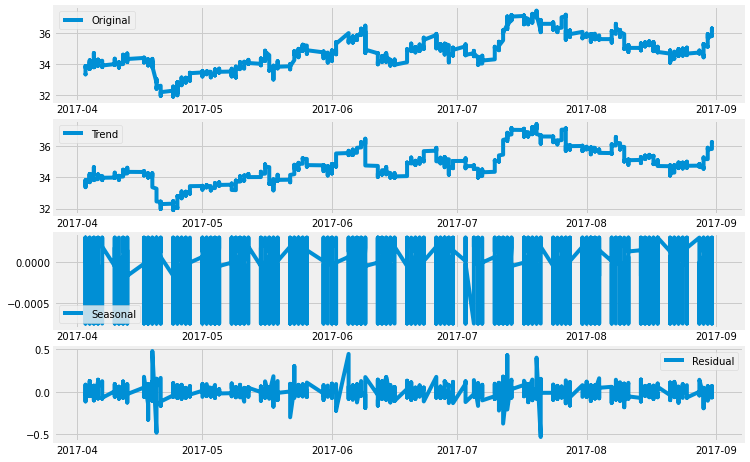

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_EBAY['NASDAQ.EBAY'],period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_EBAY['NASDAQ.EBAY'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

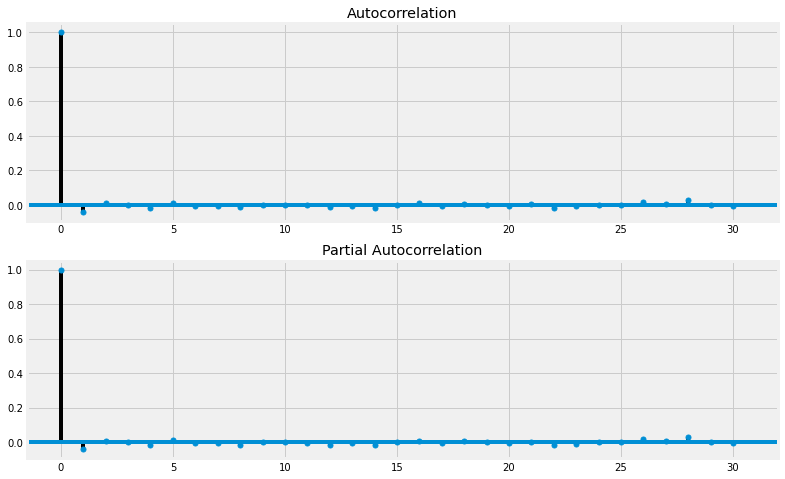

In [91]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_EBAY["NASDAQ.EBAY_diff"].iloc[1:], lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_EBAY["NASDAQ.EBAY_diff"].iloc[1:], lags=30, ax=ax2)

In [92]:
model= sm.tsa.statespace.SARIMAX(df_EBAY['NASDAQ.EBAY'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.EBAY   No. Observations:                41266
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               82105.942
Date:                            Sat, 06 Mar 2021   AIC                        -164209.884
Time:                                    18:33:19   BIC                        -164201.257
Sample:                                         0   HQIC                       -164207.157
                                          - 41266                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011   9.43e-07   1158.816      0.000       0.001       0.001
Ljung-Box (Q):                    1

In [93]:
df_EBAY['Forecast'] = results.predict()

<ipython-input-93-c5fd5ca46a01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EBAY['Forecast'] = results.predict()


In [94]:
df_EBAY[['NASDAQ.EBAY','Forecast']].head()

,NASDAQ.EBAY,Forecast
DATE,,
2017-04-03,33.3975,0.0000
2017-04-03,33.3950,33.3975
2017-04-03,33.4100,33.3950
2017-04-03,33.3350,33.4100
2017-04-03,33.4000,33.3350


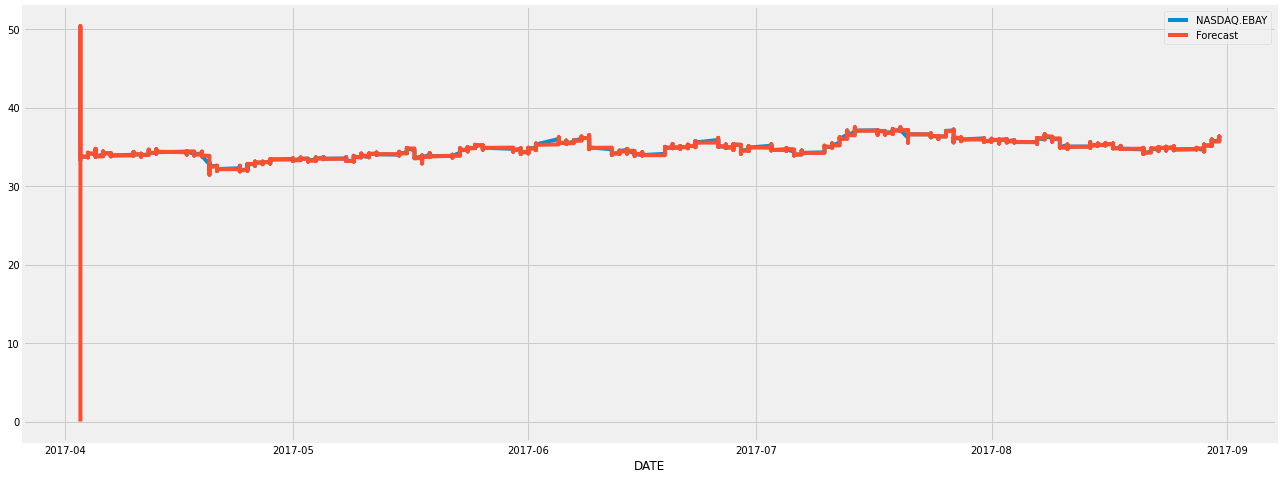

In [95]:
df_EBAY[['NASDAQ.EBAY','Forecast']].plot(figsize=(20,8))

In [96]:
results.forecast(steps=10)

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41266    36.090
41267    36.030
41268    36.030
41269    36.020
41270    36.020
41271    36.025
41272    36.020
41273    36.025
41274    36.020
41275    36.020
dtype: float64

In [97]:
results.predict(start=41265,end=41275)

C:\Users\poona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41265    36.110
41266    36.090
41267    36.030
41268    36.030
41269    36.020
41270    36.020
41271    36.025
41272    36.020
41273    36.025
41274    36.020
41275    36.020
dtype: float64

In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_EBAY['NASDAQ.EBAY'],df_EBAY['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_EBAY['NASDAQ.EBAY'],df_EBAY['Forecast']))


Mean Squared Error NASDAQ.AAPL - 0.03483180294093334
Mean Absolute Error NASDAQ.AAPL - 0.021687235315374892


# Conclusion-The predicted stock prices values have been stored in the the forecast columns of the each stock entity dataframe